In [5]:
import pandas as pd

In [6]:
LstmDataset = pd.read_csv('/home/meraj/Downloads/BdSL_Bangla Sign_Language/BdSL_Combined_Dataset.csv')

In [7]:
LstmDataset

,p1,p2,p3,p4,p5,r1,r2,r3,r4,r5,label
0,-75.51,31.61,42.67,47.63,48.68,-24.54,-39.51,-71.11,-90.23,-96.62,আ
1,-76.55,31.19,42.15,46.97,49.23,-25.16,-37.45,-69.21,-87.12,-94.74,আ
2,-75.40,31.93,42.54,47.84,49.17,-30.79,-37.02,-67.21,-86.71,-94.30,আ
3,-76.58,31.89,41.76,46.61,48.07,-29.20,-38.75,-68.96,-86.83,-93.34,আ
4,-76.36,31.25,41.66,46.74,48.26,-25.94,-38.56,-69.46,-88.49,-95.28,আ
...,...,...,...,...,...,...,...,...,...,...,...
1944,-68.85,4.86,-10.78,-11.55,68.87,-20.97,25.56,13.15,8.83,-75.79,ঔ
1945,-74.62,8.41,-6.73,-7.38,71.17,-23.81,27.32,15.41,11.92,-82.75,ঔ
1946,-73.03,7.57,-7.74,-8.52,69.47,-20.68,26.07,13.90,9.90,-81.36,ঔ
1947,-72.72,7.40,-7.56,-8.27,70.23,-18.96,25.85,13.80,10.10,-81.86,ঔ


In [8]:
LstmDataset.isnull().sum()

p1       0
p2       0
p3       0
p4       0
p5       0
r1       0
r2       0
r3       0
r4       0
r5       0
label    0
dtype: int64

In [9]:
# Data exploration
print("Dataset shape:", LstmDataset.shape)
print("\nDataset info:")
print(LstmDataset.info())
print("\nLabel distribution:")
print(LstmDataset['label'].value_counts().sort_index())

Dataset shape: (1949, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p1      1949 non-null   float64
 1   p2      1949 non-null   float64
 2   p3      1949 non-null   float64
 3   p4      1949 non-null   float64
 4   p5      1949 non-null   float64
 5   r1      1949 non-null   float64
 6   r2      1949 non-null   float64
 7   r3      1949 non-null   float64
 8   r4      1949 non-null   float64
 9   r5      1949 non-null   float64
 10  label   1949 non-null   object 
dtypes: float64(10), object(1)
memory usage: 167.6+ KB
None

Label distribution:
label
আ    276
ই    275
উ    281
এ    276
ঐ    297
ও    273
ঔ    271
Name: count, dtype: int64


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2025-07-12 21:50:38.630298: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-12 21:50:38.640233: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-12 21:50:38.726446: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-12 21:50:38.813398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752335438.887041  101086 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752335438.90

In [11]:
# Prepare data for LSTM
# Separate features and labels
X = LstmDataset.drop('label', axis=1).values  # Features (p1-p5, r1-r5)
y = LstmDataset['label'].values  # Labels

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (samples, timesteps, features)
# Since we have 10 features (p1-p5, r1-r5), we can treat them as sequence
# For this case, let's reshape to (samples, 2, 5) - 2 timesteps with 5 features each
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 2, 5)

print("Original shape:", X.shape)
print("Reshaped for LSTM:", X_reshaped.shape)
print("Number of classes:", len(np.unique(y_encoded)))
print("Classes:", label_encoder.classes_)

Original shape: (1949, 10)
Reshaped for LSTM: (1949, 2, 5)
Number of classes: 7
Classes: ['আ' 'ই' 'উ' 'এ' 'ঐ' 'ও' 'ঔ']


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (1559, 2, 5)
Test set shape: (390, 2, 5)
Training labels shape: (1559,)
Test labels shape: (390,)


In [13]:
# Build LSTM model
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(2, 5)),
    layers.Dropout(0.3),
    layers.LSTM(32, return_sequences=False),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

2025-07-12 21:51:18.364477: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/meraj/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 2, 64)          │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,903 (128.53 KB)

 Trainable params: 32,903 (128.53 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

print("Training completed!")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.2978 - loss: 1.9133 - val_accuracy: 0.5705 - val_loss: 1.7060
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4474 - loss: 1.5656 - val_accuracy: 0.5929 - val_loss: 1.1542
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6790 - loss: 1.0540 - val_accuracy: 0.8269 - val_loss: 0.6069
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8559 - loss: 0.5276 - val_accuracy: 0.9615 - val_loss: 0.2529
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9375 - loss: 0.2487 - val_accuracy: 0.9840 - val_loss: 0.0919
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9626 - loss: 0.1405 - val_accuracy: 0.9904 - val_loss: 0.0427
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9758 - loss: 0.0955 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9915 - loss: 0.0509 - val_accuracy: 0.9904 - v

In [15]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, 
                          target_names=label_encoder.classes_))

Test Accuracy: 0.9974
Test Loss: 0.0472
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step

Classification Report:
              precision    recall  f1-score   support

           আ       1.00      0.98      0.99        55
           ই       1.00      1.00      1.00        55
           উ       1.00      1.00      1.00        56
           এ       1.00      1.00      1.00        55
           ঐ       1.00      1.00      1.00        60
           ও       0.98      1.00      0.99        55
           ঔ       1.00      1.00      1.00        54

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2441 (\N{BENGALI LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2448 (\N{BENGALI LETTER AI}) missing from font(s) DejaVu Sans.
  fig.canv

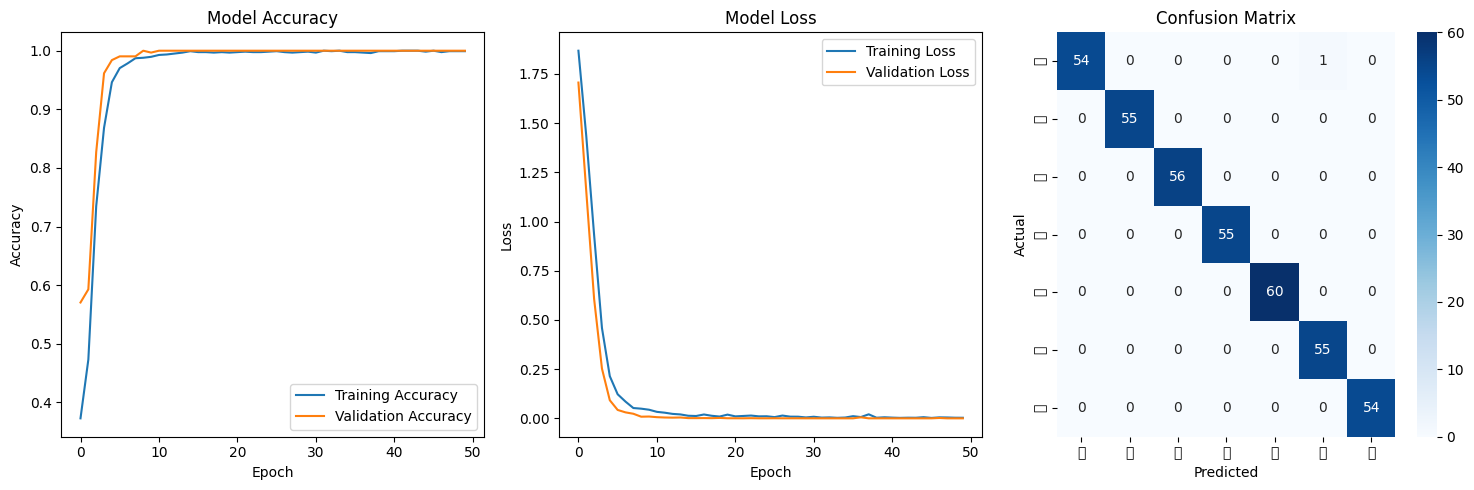

In [18]:
# Plot training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [17]:
# Save the model
model.save('bangla_sign_language_lstm_model.h5')
print("Model saved as 'bangla_sign_language_lstm_model.h5'")

# Save the label encoder and scaler for future use
import pickle

with open('lstm_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

with open('lstm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Label encoder and scaler saved!")

Model saved as 'bangla_sign_language_lstm_model.h5'
Label encoder and scaler saved!


/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2439 (\N{BENGALI LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2441 (\N{BENGALI LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2447 (\N{BENGALI LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/meraj/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 2448 (\N{BENGALI LETTER AI}) missing from font(s) DejaVu Sans.
  fig.canv

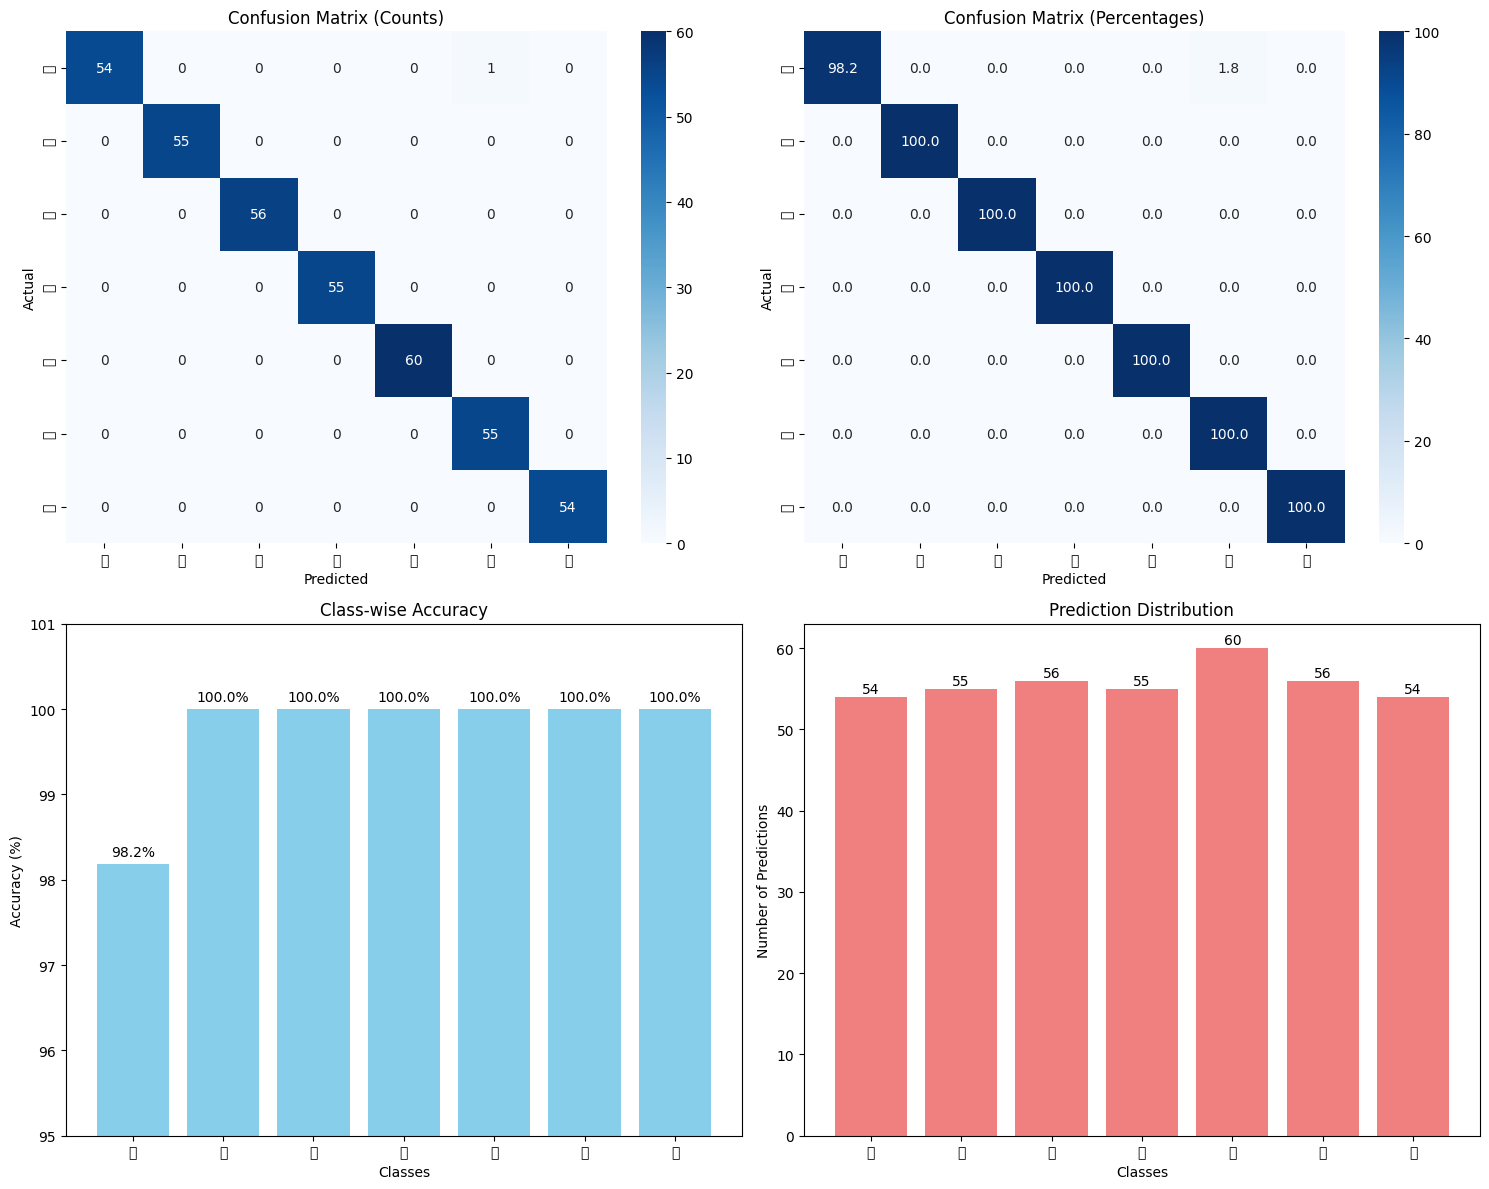

=== CONFUSION MATRIX ANALYSIS ===
Total test samples: 390
Correctly classified: 389
Misclassified: 1
Overall accuracy: 99.74%

=== CLASS-WISE PERFORMANCE ===
আ: Precision=1.000, Recall=0.982, Samples=55
ই: Precision=1.000, Recall=1.000, Samples=55
উ: Precision=1.000, Recall=1.000, Samples=56
এ: Precision=1.000, Recall=1.000, Samples=55
ঐ: Precision=1.000, Recall=1.000, Samples=60
ও: Precision=0.982, Recall=1.000, Samples=55
ঔ: Precision=1.000, Recall=1.000, Samples=54

=== MISCLASSIFICATION DETAILS ===
আ misclassified as ও: 1 times


In [19]:
# Detailed Confusion Matrix Analysis
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create subplots for detailed analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix (Counts)')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. Confusion Matrix with percentages
sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix (Percentages)')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# 3. Class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1) * 100
axes[1,0].bar(label_encoder.classes_, class_accuracy, color='skyblue')
axes[1,0].set_title('Class-wise Accuracy')
axes[1,0].set_xlabel('Classes')
axes[1,0].set_ylabel('Accuracy (%)')
axes[1,0].set_ylim(95, 101)
for i, v in enumerate(class_accuracy):
    axes[1,0].text(i, v + 0.1, f'{v:.1f}%', ha='center')

# 4. Prediction distribution
pred_counts = np.bincount(y_pred_classes)
axes[1,1].bar(label_encoder.classes_, pred_counts, color='lightcoral')
axes[1,1].set_title('Prediction Distribution')
axes[1,1].set_xlabel('Classes')
axes[1,1].set_ylabel('Number of Predictions')
for i, v in enumerate(pred_counts):
    axes[1,1].text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=== CONFUSION MATRIX ANALYSIS ===")
print(f"Total test samples: {len(y_test)}")
print(f"Correctly classified: {np.trace(cm)}")
print(f"Misclassified: {len(y_test) - np.trace(cm)}")
print(f"Overall accuracy: {np.trace(cm)/len(y_test)*100:.2f}%")

print("\n=== CLASS-WISE PERFORMANCE ===")
for i, class_name in enumerate(label_encoder.classes_):
    true_positive = cm[i, i]
    total_actual = cm[i, :].sum()
    total_predicted = cm[:, i].sum()
    
    precision = true_positive / total_predicted if total_predicted > 0 else 0
    recall = true_positive / total_actual if total_actual > 0 else 0
    
    print(f"{class_name}: Precision={precision:.3f}, Recall={recall:.3f}, Samples={total_actual}")

print("\n=== MISCLASSIFICATION DETAILS ===")
for i in range(len(label_encoder.classes_)):
    for j in range(len(label_encoder.classes_)):
        if i != j and cm[i, j] > 0:
            print(f"{label_encoder.classes_[i]} misclassified as {label_encoder.classes_[j]}: {cm[i, j]} times")